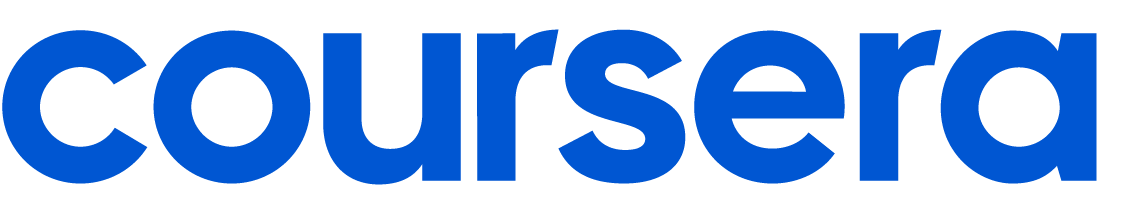

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [3]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [4]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [5]:
# Display descriptive statistics for numerical columns
display(train_df.describe())

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


In [6]:
# Check for missing values
print(train_df.isnull().sum())

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64


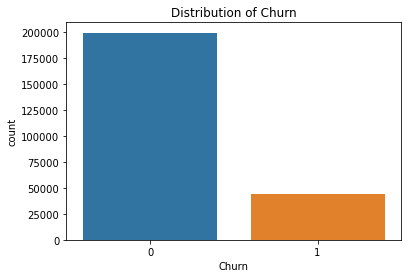

In [7]:
# Visualize the distribution of the target variable 'Churn'
sns.countplot(x='Churn', data=train_df)
plt.title('Distribution of Churn')
plt.show()

In [8]:
# Check for duplicate rows in the training data
duplicate_rows_train = train_df.duplicated().sum()
print(f"Number of duplicate rows in train_df: {duplicate_rows_train}")
# Check for duplicate rows in the testing data
duplicate_rows_test = test_df.duplicated().sum()
print(f"Number of duplicate rows in test_df: {duplicate_rows_test}")

Number of duplicate rows in train_df: 0
Number of duplicate rows in test_df: 0


In [9]:
# Binary encoding for 'Yes'/'No' columns
binary_cols_yes_no = ['PaperlessBilling', 'MultiDeviceAccess', 'ParentalControl', 'SubtitlesEnabled']
for col in binary_cols_yes_no:
    train_df[col] = train_df[col].apply(lambda x: 1 if x == 'Yes' else 0)
    test_df[col] = test_df[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Binary encoding for 'Gender'
train_df['Gender'] = train_df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
test_df['Gender'] = test_df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# One-hot encode the remaining categorical columns
# Let's check the columns again before encoding to make sure we have the correct ones
categorical_cols = [col for col in train_df.columns if train_df[col].dtype == 'object' and col not in ['CustomerID']]

train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

# Convert boolean columns to integers (0 and 1) - this was already handled by get_dummies in newer pandas versions, but kept for compatibility
for col in train_df.columns:
    if train_df[col].dtype == 'bool':
        train_df[col] = train_df[col].astype(int)

for col in test_df.columns:
    if test_df[col].dtype == 'bool':
        test_df[col] = test_df[col].astype(int)

# Reorder columns to have 'CustomerID' at the beginning
customer_id_col_train = train_df.pop('CustomerID')
train_df.insert(0, 'CustomerID', customer_id_col_train)

customer_id_col_test = test_df.pop('CustomerID')
test_df.insert(0, 'CustomerID', customer_id_col_test)


print("Train DataFrame after encoding and reordering columns:")
display(train_df.head())

print("\nTest DataFrame after encoding and reordering columns:")
display(test_df.head())

print("\nExample of binary encoding (Yes=1, No=0, Male=1, Female=0):")
display(train_df[['PaperlessBilling', 'Gender']].head())

print("\nExample of one-hot encoding (new columns created for each category):")
display(train_df[['SubscriptionType_Standard', 'SubscriptionType_Premium', 'ContentType_Movies', 'ContentType_TV Shows']].head())

Train DataFrame after encoding and reordering columns:


,CustomerID,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,...,PaymentMethod_Mailed check,ContentType_Movies,ContentType_TV Shows,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi
0,CB6SXPNVZA,20,11.055215,221.104302,0,0,36.758104,63.531377,10,2.176498,...,1,0,0,1,0,0,0,0,0,1
1,S7R2G87O09,57,5.175208,294.986882,1,0,32.450568,25.725595,18,3.478632,...,0,1,0,0,0,1,0,0,0,0
2,EASDC20BDT,73,12.106657,883.785952,1,0,7.395160,57.364061,23,4.238824,...,1,1,0,0,0,0,0,0,1,0
3,NPF69NT69N,32,7.263743,232.439774,0,0,27.960389,131.537507,30,4.276013,...,0,0,1,0,0,1,0,1,0,0
4,4LGYPK7VOL,57,16.953078,966.325422,1,0,20.083397,45.356653,20,3.616170,...,0,0,1,0,1,0,1,0,0,0



Test DataFrame after encoding and reordering columns:


,CustomerID,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,...,PaymentMethod_Mailed check,ContentType_Movies,ContentType_TV Shows,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi
0,O1W6BHP6RM,38,17.869374,679.036195,0,0,29.126308,122.274031,42,3.522724,...,1,0,1,0,1,0,1,0,0,0
1,LFR4X92X8H,77,9.912854,763.289768,1,0,36.873729,57.093319,43,2.021545,...,0,0,1,0,1,0,0,0,0,0
2,QM5GBIYODA,5,15.019011,75.095057,0,1,7.601729,140.414001,14,4.806126,...,0,0,1,0,0,0,0,0,0,1
3,D9RXTK2K9F,88,15.357406,1351.451692,0,1,35.586430,177.002419,14,4.943900,...,0,0,0,0,0,1,1,0,0,0
4,ENTCCHR1LR,91,12.406033,1128.949004,1,1,23.503651,70.308376,6,2.846880,...,0,0,1,0,0,1,0,1,0,0



Example of binary encoding (Yes=1, No=0, Male=1, Female=0):


,PaperlessBilling,Gender
0,0,1
1,1,1
2,1,1
3,0,1
4,1,0



Example of one-hot encoding (new columns created for each category):


,SubscriptionType_Standard,SubscriptionType_Premium,ContentType_Movies,ContentType_TV Shows
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,1,0,1


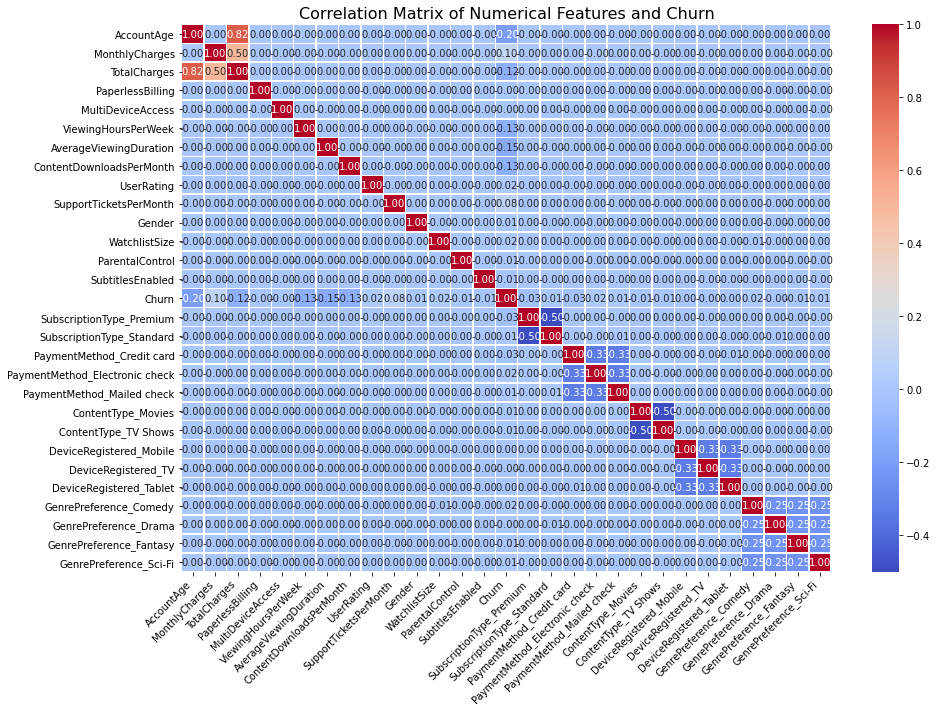

In [10]:
# 1. Select the relevant numerical columns from train_df (excluding 'CustomerID').
# The 'Churn' column is also numerical and is the target, so include it to see correlations with features.
numerical_cols = train_df.select_dtypes(include=np.number).columns.tolist()
# Exclude 'CustomerID' as it's an identifier, although it's technically numerical after some encoding
if 'CustomerID' in numerical_cols:
    numerical_cols.remove('CustomerID')

# Ensure 'Churn' is in the list if it exists
if 'Churn' not in numerical_cols and 'Churn' in train_df.columns:
    numerical_cols.append('Churn')

train_numerical_df = train_df[numerical_cols]

# 2. Calculate the correlation matrix for the selected columns using the .corr() method.
correlation_matrix = train_numerical_df.corr()

# 3. Create a heatmap of the correlation matrix using seaborn.heatmap().
plt.figure(figsize=(14, 10)) # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)

# 4. Customize the heatmap with appropriate annotations, color map, and title.
plt.title('Correlation Matrix of Numerical Features and Churn', fontsize=16)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.yticks(rotation=0)
plt.tight_layout() # Adjust layout to prevent labels overlapping

# 5. Display the heatmap.
plt.show()

# 6. Analyze the heatmap (This is a manual interpretation step after the plot is displayed).
# Look for high absolute values in the 'Churn' row/column for feature-churn correlations.
# Look for high absolute values between independent features for multicollinearity.

In [11]:
# 1. Create a histogram of the 'AccountAge' column

# 2. Create age bins
bins = [0, 12, 36, train_df['AccountAge'].max()]
labels = ['0-12 months', '13-36 months', '37+ months']
train_df['AccountAge_Bin'] = pd.cut(train_df['AccountAge'], bins=bins, labels=labels, right=True, include_lowest=True)

# 3. Calculate churn rate for each 'AccountAge' bin
churn_rate_by_age_bin = train_df.groupby('AccountAge_Bin')['Churn'].mean().reset_index()

churn_rate_by_subscription = train_df.groupby(['SubscriptionType_Standard', 'SubscriptionType_Premium'])['Churn'].mean().reset_index()

# Map the one-hot encoded combinations back to original subscription types
def get_subscription_type_from_onehot(row):
    if row['SubscriptionType_Premium'] == 1:
        return 'Premium'
    elif row['SubscriptionType_Standard'] == 1:
        return 'Standard'
    else:
        return 'Basic' # 'Basic' was the dropped column

churn_rate_by_subscription['Original_SubscriptionType'] = churn_rate_by_subscription.apply(get_subscription_type_from_onehot, axis=1)

# Drop the temporary column created in the previous attempt if it exists
if 'Original_SubscriptionType' in train_df.columns:
    train_df = train_df.drop(columns=['Original_SubscriptionType'])
    
    
# 1. Calculate the mean churn rate for each unique value in the 'PaymentMethod' column of the train_df DataFrame.
# Since PaymentMethod was one-hot encoded, we need to group by the original payment method categories.
# We can do this by grouping by the one-hot encoded columns and then mapping back to the original names.
payment_method_cols = [col for col in train_df.columns if col.startswith('PaymentMethod_')]
churn_rate_by_payment_method = train_df.groupby(payment_method_cols)['Churn'].mean().reset_index()

# Map the one-hot encoded combinations back to original payment methods
def get_payment_method_from_onehot(row):
    if row['PaymentMethod_Credit card'] == 1:
        return 'Credit card'
    elif row['PaymentMethod_Electronic check'] == 1:
        return 'Electronic check'
    elif row['PaymentMethod_Mailed check'] == 1:
        return 'Mailed check'
    else:
        return 'Bank transfer' # 'Bank transfer' was the dropped column

churn_rate_by_payment_method['Original_PaymentMethod'] = churn_rate_by_payment_method.apply(get_payment_method_from_onehot, axis=1)

# 2. Sort the calculated churn rates in descending order.
churn_rate_by_payment_method = churn_rate_by_payment_method.sort_values('Churn', ascending=False)

# 1. Calculate the mean churn rate for each unique value in the 'PaperlessBilling' column of the train_df DataFrame.
# Since 'PaperlessBilling' was binary encoded (1 for Yes, 0 for No), we can group directly by this column.
churn_rate_by_paperless_billing = train_df.groupby('PaperlessBilling')['Churn'].mean().reset_index()

# Map the encoded values back to descriptive labels for plotting
churn_rate_by_paperless_billing['PaperlessBilling_Status'] = churn_rate_by_paperless_billing['PaperlessBilling'].map({0: 'No Paperless Billing', 1: 'Yes Paperless Billing'})

# 1. Calculate the mean churn rate for each unique value in the 'ContentType' column.
# Group by the one-hot encoded ContentType columns.
content_type_cols = [col for col in train_df.columns if col.startswith('ContentType_')]
churn_rate_by_content_type = train_df.groupby(content_type_cols)['Churn'].mean().reset_index()

# Map the one-hot encoded combinations back to original content types
def get_content_type_from_onehot(row):
    if row['ContentType_Movies'] == 1:
        return 'Movies'
    elif row['ContentType_TV Shows'] == 1:
        return 'TV Shows'
    else:
        return 'Both' # 'Both' was the dropped column

churn_rate_by_content_type['Original_ContentType'] = churn_rate_by_content_type.apply(get_content_type_from_onehot, axis=1)


# 3. Calculate the mean churn rate for each unique value in the 'GenrePreference' column.
# Group by the one-hot encoded GenrePreference columns.
genre_preference_cols = [col for col in train_df.columns if col.startswith('GenrePreference_')]
churn_rate_by_genre_preference = train_df.groupby(genre_preference_cols)['Churn'].mean().reset_index()

# Map the one-hot encoded combinations back to original genre preferences
def get_genre_preference_from_onehot(row):
    if row['GenrePreference_Comedy'] == 1:
        return 'Comedy'
    elif row['GenrePreference_Drama'] == 1:
        return 'Drama'
    elif row['GenrePreference_Fantasy'] == 1:
        return 'Fantasy'
    elif row['GenrePreference_Sci-Fi'] == 1:
        return 'Sci-Fi'
    else:
        return 'Action' # Assuming 'Action' was the dropped column based on previous output

churn_rate_by_genre_preference['Original_GenrePreference'] = churn_rate_by_genre_preference.apply(get_genre_preference_from_onehot, axis=1)

# 1. Calculate the mean churn rate for each unique value in the 'MultiDeviceAccess' column.
# 'MultiDeviceAccess' was binary encoded (1 for Yes, 0 for No), so we can group directly.
churn_rate_by_multi_device = train_df.groupby('MultiDeviceAccess')['Churn'].mean().reset_index()

# Map the encoded values back to descriptive labels for plotting
churn_rate_by_multi_device['MultiDeviceAccess_Status'] = churn_rate_by_multi_device['MultiDeviceAccess'].map({0: 'No Multi-Device Access', 1: 'Yes Multi-Device Access'})

# 3. Calculate the mean churn rate for each unique value in the 'DeviceRegistered' column.
# Group by the one-hot encoded DeviceRegistered columns.
device_registered_cols = [col for col in train_df.columns if col.startswith('DeviceRegistered_')]
churn_rate_by_device_registered = train_df.groupby(device_registered_cols)['Churn'].mean().reset_index()

# Map the one-hot encoded combinations back to original device types
def get_device_registered_from_onehot(row):
    if row['DeviceRegistered_Mobile'] == 1:
        return 'Mobile'
    elif row['DeviceRegistered_TV'] == 1:
        return 'TV'
    elif row['DeviceRegistered_Tablet'] == 1:
        return 'Tablet'
    else:
        return 'Computer' # Assuming 'Computer' was the dropped column

churn_rate_by_device_registered['Original_DeviceRegistered'] = churn_rate_by_device_registered.apply(get_device_registered_from_onehot, axis=1)

# 1. Calculate the mean churn rate for each unique value in the `SupportTicketsPerMonth` column
churn_rate_by_support_tickets = train_df.groupby('SupportTicketsPerMonth')['Churn'].mean().reset_index()

# 1. Calculate the mean churn rate for each unique value in the `WatchlistSize` column
churn_rate_by_watchlist_size = train_df.groupby('WatchlistSize')['Churn'].mean().reset_index()


# 1. Calculate the mean churn rate for each unique value in the 'ParentalControl' column.
# 'ParentalControl' was binary encoded (1 for Yes, 0 for No).
churn_rate_by_parental_control = train_df.groupby('ParentalControl')['Churn'].mean().reset_index()

# 2. Map the encoded values back to descriptive labels for plotting.
churn_rate_by_parental_control['ParentalControl_Status'] = churn_rate_by_parental_control['ParentalControl'].map({0: 'Parental Control Off', 1: 'Parental Control On'})

# 6. Calculate the mean churn rate for each unique value in the 'SubtitlesEnabled' column.
# 'SubtitlesEnabled' was binary encoded (1 for Yes, 0 for No).
churn_rate_by_subtitles_enabled = train_df.groupby('SubtitlesEnabled')['Churn'].mean().reset_index()

# 7. Map the encoded values back to descriptive labels for plotting.
churn_rate_by_subtitles_enabled['SubtitlesEnabled_Status'] = churn_rate_by_subtitles_enabled['SubtitlesEnabled'].map({0: 'Subtitles Off', 1: 'Subtitles On'})

from scipy.stats import chi2_contingency

# 1. Calculate the mean churn rate for each unique value in the `Gender` column.
churn_rate_by_gender = train_df.groupby('Gender')['Churn'].mean().reset_index()

# Map the encoded values back to descriptive labels for plotting
churn_rate_by_gender['Gender_Status'] = churn_rate_by_gender['Gender'].map({0: 'Female', 1: 'Male'})

# 5. Perform a statistical test (chi-squared test) to assess if the difference in churn rates between genders is statistically significant.
# Create a contingency table of Gender vs. Churn
contingency_table = pd.crosstab(train_df['Gender'], train_df['Churn'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 6. Print the results of the statistical test, including the p-value.
print("\nChi-Squared Test Results for Churn Rate by Gender:")
print(f"Chi-squared statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
# print("Expected frequencies table:")
# print(expected)

if p < 0.05:
    print("\nThe difference in churn rates between genders is statistically significant (p < 0.05).")
else:
    print("\nThe difference in churn rates between genders is not statistically significant (p >= 0.05).")
    




Chi-Squared Test Results for Churn Rate by Gender:
Chi-squared statistic: 13.5542
P-value: 0.0002
Degrees of freedom: 1

The difference in churn rates between genders is statistically significant (p < 0.05).


In [12]:
print("Detailed Churn Rates by Category:")

print("\n1. Churn Rate by Account Age Bin:")
display(churn_rate_by_age_bin)

print("\n2. Churn Rate by Subscription Type:")
# Re-map original subscription type for display if needed
if 'Original_SubscriptionType' not in churn_rate_by_subscription.columns:
    def get_subscription_type_from_onehot(row):
        if row['SubscriptionType_Premium'] == 1:
            return 'Premium'
        elif row['SubscriptionType_Standard'] == 1:
            return 'Standard'
        else:
            return 'Basic'
    churn_rate_by_subscription['Original_SubscriptionType'] = churn_rate_by_subscription.apply(get_subscription_type_from_onehot, axis=1)
display(churn_rate_by_subscription[['Original_SubscriptionType', 'Churn']])


print("\n3. Churn Rate by Payment Method:")
# Re-map original payment method for display if needed
if 'Original_PaymentMethod' not in churn_rate_by_payment_method.columns:
    def get_payment_method_from_onehot(row):
        if row['PaymentMethod_Credit card'] == 1:
            return 'Credit card'
        elif row['PaymentMethod_Electronic check'] == 1:
            return 'Electronic check'
        elif row['PaymentMethod_Mailed check'] == 1:
            return 'Mailed check'
        else:
            return 'Bank transfer'
    churn_rate_by_payment_method['Original_PaymentMethod'] = churn_rate_by_payment_method.apply(get_payment_method_from_onehot, axis=1)
display(churn_rate_by_payment_method[['Original_PaymentMethod', 'Churn']])

print("\n4. Churn Rate by Paperless Billing Status:")
# Re-map original status for display if needed
if 'PaperlessBilling_Status' not in churn_rate_by_paperless_billing.columns:
     churn_rate_by_paperless_billing['PaperlessBilling_Status'] = churn_rate_by_paperless_billing['PaperlessBilling'].map({0: 'No Paperless Billing', 1: 'Yes Paperless Billing'})
display(churn_rate_by_paperless_billing[['PaperlessBilling_Status', 'Churn']])

print("\n5. Churn Rate by Content Type:")
# Re-map original content type for display if needed
if 'Original_ContentType' not in churn_rate_by_content_type.columns:
    def get_content_type_from_onehot(row):
        if row['ContentType_Movies'] == 1:
            return 'Movies'
        elif row['ContentType_TV Shows'] == 1:
            return 'TV Shows'
        else:
            return 'Both'
    churn_rate_by_content_type['Original_ContentType'] = churn_rate_by_content_type.apply(get_content_type_from_onehot, axis=1)
display(churn_rate_by_content_type[['Original_ContentType', 'Churn']])

print("\n6. Churn Rate by Genre Preference:")
# Re-map original genre preference for display if needed
if 'Original_GenrePreference' not in churn_rate_by_genre_preference.columns:
    def get_genre_preference_from_onehot(row):
        if row['GenrePreference_Comedy'] == 1:
            return 'Comedy'
        elif row['GenrePreference_Drama'] == 1:
            return 'Drama'
        elif row['GenrePreference_Fantasy'] == 1:
            return 'Fantasy'
        elif row['GenrePreference_Sci-Fi'] == 1:
            return 'Sci-Fi'
        else:
            return 'Action'
    churn_rate_by_genre_preference['Original_GenrePreference'] = churn_rate_by_genre_preference.apply(get_genre_preference_from_onehot, axis=1)
display(churn_rate_by_genre_preference[['Original_GenrePreference', 'Churn']])

print("\n7. Churn Rate by Multi-Device Access Status:")
# Re-map original status for display if needed
if 'MultiDeviceAccess_Status' not in churn_rate_by_multi_device.columns:
    churn_rate_by_multi_device['MultiDeviceAccess_Status'] = churn_rate_by_multi_device['MultiDeviceAccess'].map({0: 'No Multi-Device Access', 1: 'Yes Multi-Device Access'})
display(churn_rate_by_multi_device[['MultiDeviceAccess_Status', 'Churn']])

print("\n8. Churn Rate by Device Registered:")
# Re-map original device registered for display if needed
if 'Original_DeviceRegistered' not in churn_rate_by_device_registered.columns:
    def get_device_registered_from_onehot(row):
        if row['DeviceRegistered_Mobile'] == 1:
            return 'Mobile'
        elif row['DeviceRegistered_TV'] == 1:
            return 'TV'
        elif row['DeviceRegistered_Tablet'] == 1:
            return 'Tablet'
        else:
            return 'Computer'
    churn_rate_by_device_registered['Original_DeviceRegistered'] = churn_rate_by_device_registered.apply(get_device_registered_from_onehot, axis=1)
display(churn_rate_by_device_registered[['Original_DeviceRegistered', 'Churn']])

print("\n9. Churn Rate by Support Tickets Per Month:")
display(churn_rate_by_support_tickets)

print("\n10. Churn Rate by Watchlist Size:")
display(churn_rate_by_watchlist_size)

print("\n11. Churn Rate by Parental Control Status:")
# Re-map original status for display if needed
if 'ParentalControl_Status' not in churn_rate_by_parental_control.columns:
    churn_rate_by_parental_control['ParentalControl_Status'] = churn_rate_by_parental_control['ParentalControl'].map({0: 'Parental Control Off', 1: 'Parental Control On'})
display(churn_rate_by_parental_control[['ParentalControl_Status', 'Churn']])

print("\n12. Churn Rate by Subtitles Enabled Status:")
# Re-map original status for display if needed
if 'SubtitlesEnabled_Status' not in churn_rate_by_subtitles_enabled.columns:
    churn_rate_by_subtitles_enabled['SubtitlesEnabled_Status'] = churn_rate_by_subtitles_enabled['SubtitlesEnabled'].map({0: 'Subtitles Off', 1: 'Subtitles On'})
display(churn_rate_by_subtitles_enabled[['SubtitlesEnabled_Status', 'Churn']])

print("\n13. Churn Rate by Gender Status:")
# Re-map original status for display if needed
if 'Gender_Status' not in churn_rate_by_gender.columns:
    churn_rate_by_gender['Gender_Status'] = churn_rate_by_gender['Gender'].map({0: 'Female', 1: 'Male'})
display(churn_rate_by_gender[['Gender_Status', 'Churn']])

Detailed Churn Rates by Category:

1. Churn Rate by Account Age Bin:


,AccountAge_Bin,Churn
0,0-12 months,0.311575
1,13-36 months,0.264698
2,37+ months,0.138520



2. Churn Rate by Subscription Type:


,Original_SubscriptionType,Churn
0,Basic,0.196521
1,Premium,0.162775
2,Standard,0.184314



3. Churn Rate by Payment Method:


,Original_PaymentMethod,Churn
2,Electronic check,0.192471
1,Mailed check,0.190888
0,Bank transfer,0.179269
3,Credit card,0.162251



4. Churn Rate by Paperless Billing Status:


,PaperlessBilling_Status,Churn
0,No Paperless Billing,0.181587
1,Yes Paperless Billing,0.180876



5. Churn Rate by Content Type:


,Original_ContentType,Churn
0,Both,0.188470
1,TV Shows,0.177398
2,Movies,0.177764



6. Churn Rate by Genre Preference:


,Original_GenrePreference,Churn
0,Action,0.165866
1,Sci-Fi,0.191444
2,Fantasy,0.176734
3,Drama,0.178709
4,Comedy,0.193416



7. Churn Rate by Multi-Device Access Status:


,MultiDeviceAccess_Status,Churn
0,No Multi-Device Access,0.181727
1,Yes Multi-Device Access,0.180736



8. Churn Rate by Device Registered:


,Original_DeviceRegistered,Churn
0,Computer,0.181350
1,Tablet,0.182147
2,TV,0.179044
3,Mobile,0.182372



9. Churn Rate by Support Tickets Per Month:


,SupportTicketsPerMonth,Churn
0,0,0.133583
1,1,0.145081
2,2,0.152020
3,3,0.161289
4,4,0.174547
5,5,0.182750
6,6,0.196041
7,7,0.206164
8,8,0.224385
9,9,0.235973



10. Churn Rate by Watchlist Size:


,WatchlistSize,Churn
0,0,0.161177
1,1,0.168646
2,2,0.174492
3,3,0.168255
4,4,0.174366
5,5,0.173210
6,6,0.174839
7,7,0.175776
8,8,0.169010
9,9,0.183797



11. Churn Rate by Parental Control Status:


,ParentalControl_Status,Churn
0,Parental Control Off,0.183366
1,Parental Control On,0.179105



12. Churn Rate by Subtitles Enabled Status:


,SubtitlesEnabled_Status,Churn
0,Subtitles Off,0.186009
1,Subtitles On,0.176477



13. Churn Rate by Gender Status:


,Gender_Status,Churn
0,Female,0.178356
1,Male,0.184109


In [13]:
# Feature Engineering based on analysis of churn rates

# Need to create 'AccountAge_Bin' for test_df as well, as it was only created for train_df previously
bins = [0, 12, 36, train_df['AccountAge'].max()] # Use train_df max age for consistency in bins
labels = ['0-12 months', '13-36 months', '37+ months']
test_df['AccountAge_Bin'] = pd.cut(test_df['AccountAge'], bins=bins, labels=labels, right=True, include_lowest=True)


# 1. Feature based on SupportTicketsPerMonth: High Support Ticket User (Binary)
# Based on the line plot, churn rate increases significantly with the number of support tickets.
# Let's define a threshold (e.g., > 5 tickets) to identify users with high support ticket interaction.
train_df['HighSupportTicketUser'] = (train_df['SupportTicketsPerMonth'] > 5).astype(int)
test_df['HighSupportTicketUser'] = (test_df['SupportTicketsPerMonth'] > 5).astype(int)

# 2. Feature based on AccountAge: Early Stage User (Binary)
# The churn rate is highest for users in the '0-12 months' bin.
# Let's create a binary feature for users in this early stage.
train_df['EarlyStageUser'] = (train_df['AccountAge_Bin'] == '0-12 months').astype(int)
test_df['EarlyStageUser'] = (test_df['AccountAge_Bin'] == '0-12 months').astype(int)


# 3. Feature based on TotalCharges and MonthlyCharges: Average Monthly Spend over Lifetime
# This feature could capture if a user's average monthly spend is consistent with their current plan
# Handle potential division by zero if AccountAge is 0 (although describe shows min is 1)
train_df['AvgMonthlySpend_Lifetime'] = train_df['TotalCharges'] / train_df['AccountAge']
# Use a small epsilon to avoid division by zero if AccountAge could be 0 in test set
test_df['AvgMonthlySpend_Lifetime'] = test_df['TotalCharges'] / (test_df['AccountAge'] + 1e-6)


# 4. Interaction Feature: AccountAge * MonthlyCharges
# This could capture if older accounts with high monthly charges behave differently
train_df['AccountAge_MonthlyCharges_Interaction'] = train_df['AccountAge'] * train_df['MonthlyCharges']
test_df['AccountAge_MonthlyCharges_Interaction'] = test_df['AccountAge'] * test_df['MonthlyCharges']

# 5. Interaction Feature: AccountAge * TotalCharges
# This could capture if older accounts with high total charges behave differently
train_df['AccountAge_TotalCharges_Interaction'] = train_df['AccountAge'] * train_df['TotalCharges']
test_df['AccountAge_TotalCharges_Interaction'] = test_df['AccountAge'] * test_df['TotalCharges']


# 6. Feature based on Charges and Subscription Type
# Check if TotalCharges is significantly higher or lower than expected for their SubscriptionType
# We can use the median TotalCharges per SubscriptionType as a reference
median_total_charges_by_subscription = train_df.groupby(['SubscriptionType_Standard', 'SubscriptionType_Premium'])['TotalCharges'].median().reset_index()

# Create a mapping for easier lookup
def get_median_total_charges(row, median_df):
    if row['SubscriptionType_Premium'] == 1:
        return median_df.loc[(median_df['SubscriptionType_Premium'] == 1), 'TotalCharges'].iloc[0]
    elif row['SubscriptionType_Standard'] == 1:
        return median_df.loc[(median_df['SubscriptionType_Standard'] == 1), 'TotalCharges'].iloc[0]
    else:
        # This handles the 'Basic' case (SubscriptionType_Standard == 0 and SubscriptionType_Premium == 0)
        # Ensure the key combination exists in the median_df index before accessing
        try:
            return median_df.loc[(median_df['SubscriptionType_Standard'] == 0) & (median_df['SubscriptionType_Premium'] == 0), 'TotalCharges'].iloc[0]
        except IndexError:
            # Fallback if 'Basic' type is not in the training data (unlikely but good practice)
            return median_df['TotalCharges'].median() # Use overall median as fallback


train_df['MedianTotalCharges_BySubscription'] = train_df.apply(lambda row: get_median_total_charges(row, median_total_charges_by_subscription), axis=1)
test_df['MedianTotalCharges_BySubscription'] = test_df.apply(lambda row: get_median_total_charges(row, median_total_charges_by_subscription), axis=1)

train_df['TotalCharges_vs_Median'] = train_df['TotalCharges'] - train_df['MedianTotalCharges_BySubscription']
test_df['TotalCharges_vs_Median'] = test_df['TotalCharges'] - test_df['MedianTotalCharges_BySubscription']

# 7. Feature based on Lifecycle Stage (using AccountAge bins)
# Based on the AccountAge churn rate plot, we see different churn behaviors across age groups.
# Let's create features for different lifecycle stages.
# We already have 'AccountAge_Bin' and 'EarlyStageUser'.
# Let's define 'Established' and 'Loyal' stages.
# Established: 13-36 months
# Loyal: 37+ months

train_df['LifecycleStage_Established'] = (train_df['AccountAge_Bin'] == '13-36 months').astype(int)
test_df['LifecycleStage_Established'] = (test_df['AccountAge_Bin'] == '13-36 months').astype(int)

train_df['LifecycleStage_Loyal'] = (train_df['AccountAge_Bin'] == '37+ months').astype(int)
test_df['LifecycleStage_Loyal'] = (test_df['AccountAge_Bin'] == '37+ months').astype(int)


# Display the first few rows with the new features
print("Train DataFrame with new features:")
display(train_df.head())

print("\nTest DataFrame with new features:")
display(test_df.head())

Train DataFrame with new features:


,CustomerID,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,...,AccountAge_Bin,HighSupportTicketUser,EarlyStageUser,AvgMonthlySpend_Lifetime,AccountAge_MonthlyCharges_Interaction,AccountAge_TotalCharges_Interaction,MedianTotalCharges_BySubscription,TotalCharges_vs_Median,LifecycleStage_Established,LifecycleStage_Loyal
0,CB6SXPNVZA,20,11.055215,221.104302,0,0,36.758104,63.531377,10,2.176498,...,13-36 months,0,0,11.055215,221.104302,4422.086039,649.667471,-428.563169,1,0
1,S7R2G87O09,57,5.175208,294.986882,1,0,32.450568,25.725595,18,3.478632,...,37+ months,1,0,5.175208,294.986882,16814.252288,652.942340,-357.955457,0,1
2,EASDC20BDT,73,12.106657,883.785952,1,0,7.395160,57.364061,23,4.238824,...,37+ months,1,0,12.106657,883.785952,64516.374468,652.942340,230.843612,0,1
3,NPF69NT69N,32,7.263743,232.439774,0,0,27.960389,131.537507,30,4.276013,...,13-36 months,0,0,7.263743,232.439774,7438.072771,652.942340,-420.502566,1,0
4,4LGYPK7VOL,57,16.953078,966.325422,1,0,20.083397,45.356653,20,3.616170,...,37+ months,0,0,16.953078,966.325422,55080.549073,649.667471,316.657951,0,1



Test DataFrame with new features:


,CustomerID,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,...,AccountAge_Bin,HighSupportTicketUser,EarlyStageUser,AvgMonthlySpend_Lifetime,AccountAge_MonthlyCharges_Interaction,AccountAge_TotalCharges_Interaction,MedianTotalCharges_BySubscription,TotalCharges_vs_Median,LifecycleStage_Established,LifecycleStage_Loyal
0,O1W6BHP6RM,38,17.869374,679.036195,0,0,29.126308,122.274031,42,3.522724,...,37+ months,0,0,17.869373,679.036195,25803.375392,649.667471,29.368723,0,1
1,LFR4X92X8H,77,9.912854,763.289768,1,0,36.873729,57.093319,43,2.021545,...,37+ months,0,0,9.912854,763.289768,58773.312149,652.942340,110.347429,0,1
2,QM5GBIYODA,5,15.019011,75.095057,0,1,7.601729,140.414001,14,4.806126,...,0-12 months,0,1,15.019008,75.095057,375.475283,647.058154,-571.963097,0,0
3,D9RXTK2K9F,88,15.357406,1351.451692,0,1,35.586430,177.002419,14,4.943900,...,37+ months,0,0,15.357405,1351.451692,118927.748874,647.058154,704.393538,0,1
4,ENTCCHR1LR,91,12.406033,1128.949004,1,1,23.503651,70.308376,6,2.846880,...,37+ months,1,0,12.406033,1128.949004,102734.359355,647.058154,481.890850,0,1


Correlation of New Features with Churn:


Churn                                    1.000000
EarlyStageUser                           0.112147
LifecycleStage_Established               0.109271
AvgMonthlySpend_Lifetime                 0.100473
HighSupportTicketUser                    0.073098
AccountAge_MonthlyCharges_Interaction   -0.120529
TotalCharges_vs_Median                  -0.120599
AccountAge_TotalCharges_Interaction     -0.138698
LifecycleStage_Loyal                    -0.168674
Name: Churn, dtype: float64

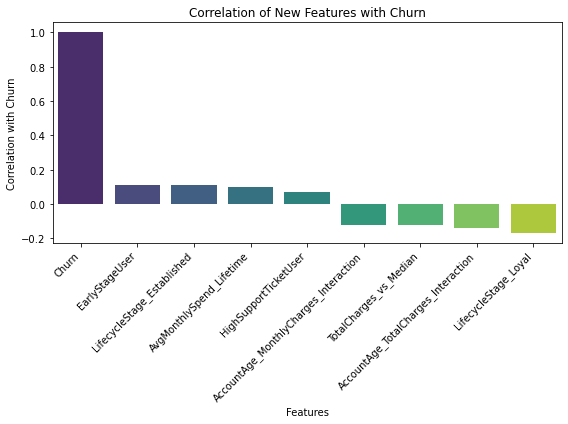

In [14]:
# Check correlations of new features with Churn

# Select the new features and Churn column
new_features = [
    'HighSupportTicketUser',
    'EarlyStageUser',
    'AvgMonthlySpend_Lifetime',
    'AccountAge_MonthlyCharges_Interaction',
    'AccountAge_TotalCharges_Interaction',
    'TotalCharges_vs_Median',
    'LifecycleStage_Established',
    'LifecycleStage_Loyal',
    'Churn' # Include Churn to see correlation
]

# Ensure all new features exist in train_df before selecting
new_features_existing = [f for f in new_features if f in train_df.columns]

correlation_with_churn = train_df[new_features_existing].corr()['Churn'].sort_values(ascending=False)

print("Correlation of New Features with Churn:")
display(correlation_with_churn)

# Optional: Visualize correlations of new features with Churn
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_churn.index, y=correlation_with_churn.values, palette='viridis')
plt.title('Correlation of New Features with Churn')
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Correlation of All Numerical Features with Churn:


EarlyStageUser                           0.112147
LifecycleStage_Established               0.109271
MonthlyCharges                           0.100473
AvgMonthlySpend_Lifetime                 0.100473
SupportTicketsPerMonth                   0.084064
HighSupportTicketUser                    0.073098
UserRating                               0.022124
WatchlistSize                            0.021739
PaymentMethod_Electronic check           0.016913
GenrePreference_Comedy                   0.015876
MedianTotalCharges_BySubscription        0.015019
PaymentMethod_Mailed check               0.014441
GenrePreference_Sci-Fi                   0.013183
Gender                                   0.007467
SubscriptionType_Standard                0.005692
DeviceRegistered_Mobile                  0.001708
DeviceRegistered_Tablet                  0.001374
PaperlessBilling                        -0.000923
MultiDeviceAccess                       -0.001285
DeviceRegistered_TV                     -0.003267


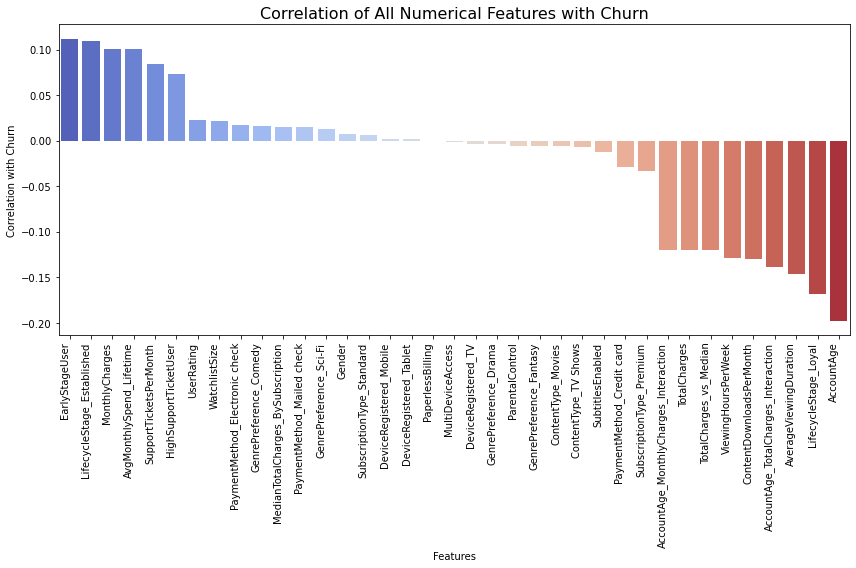

In [15]:
numerical_cols = train_df.select_dtypes(include=np.number).columns.tolist()

# Ensure 'Churn' is in the list if it exists and is not already included
if 'Churn' not in numerical_cols and 'Churn' in train_df.columns:
    numerical_cols.append('Churn')

# Exclude 'CustomerID' from the numerical columns if it was included
if 'CustomerID' in numerical_cols:
    numerical_cols.remove('CustomerID')

# Select only the numerical columns for correlation calculation
train_numerical_for_corr = train_df[numerical_cols]


# Calculate the correlation matrix for the relevant numerical columns
correlation_matrix_all = train_numerical_for_corr.corr()

# Get the correlation of all features with 'Churn' and sort them
correlation_with_churn_all = correlation_matrix_all['Churn'].sort_values(ascending=False)

# Remove the correlation of 'Churn' with itself
if 'Churn' in correlation_with_churn_all.index:
    correlation_with_churn_all = correlation_with_churn_all.drop('Churn')

print("Correlation of All Numerical Features with Churn:")
display(correlation_with_churn_all)

# Visualize the correlations
plt.figure(figsize=(12, 8)) # Adjust figure size for better readability
sns.barplot(x=correlation_with_churn_all.index, y=correlation_with_churn_all.values, palette='coolwarm')
plt.title('Correlation of All Numerical Features with Churn', fontsize=16)
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.xticks(rotation=90, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout
plt.show()

In [16]:
# 1. Examine the data types of the columns in the train_df DataFrame
print("Data types of train_df before final check:")
train_df.info()

# 2. Identify non-numerical columns in train_df (excluding CustomerID and AccountAge_Bin)
non_numerical_cols_train = train_df.select_dtypes(exclude=np.number).columns.tolist()
# Remove CustomerID and AccountAge_Bin if present
if 'CustomerID' in non_numerical_cols_train:
    non_numerical_cols_train.remove('CustomerID')
if 'AccountAge_Bin' in non_numerical_cols_train:
    non_numerical_cols_train.remove('AccountAge_Bin')
if 'Original_SubscriptionType' in non_numerical_cols_train:
    non_numerical_cols_train.remove('Original_SubscriptionType')
if 'Original_PaymentMethod' in non_numerical_cols_train:
    non_numerical_cols_train.remove('Original_PaymentMethod')
if 'PaperlessBilling_Status' in non_numerical_cols_train:
    non_numerical_cols_train.remove('PaperlessBilling_Status')
if 'Original_ContentType' in non_numerical_cols_train:
    non_numerical_cols_train.remove('Original_ContentType')
if 'Original_GenrePreference' in non_numerical_cols_train:
    non_numerical_cols_train.remove('Original_GenrePreference')
if 'MultiDeviceAccess_Status' in non_numerical_cols_train:
    non_numerical_cols_train.remove('MultiDeviceAccess_Status')
if 'Original_DeviceRegistered' in non_numerical_cols_train:
    non_numerical_cols_train.remove('Original_DeviceRegistered')
if 'ParentalControl_Status' in non_numerical_cols_train:
    non_numerical_cols_train.remove('ParentalControl_Status')
if 'SubtitlesEnabled_Status' in non_numerical_cols_train:
    non_numerical_cols_train.remove('SubtitlesEnabled_Status')
if 'Gender_Status' in non_numerical_cols_train:
    non_numerical_cols_train.remove('Gender_Status')

print("\nNon-numerical columns found in train_df (excluding identifiers and temporary visualization labels):", non_numerical_cols_train)

# 3. Repeat steps 1 and 2 for the test_df DataFrame
print("\nData types of test_df before final check:")
test_df.info()

non_numerical_cols_test = test_df.select_dtypes(exclude=np.number).columns.tolist()
# Remove CustomerID and AccountAge_Bin if present
if 'CustomerID' in non_numerical_cols_test:
    non_numerical_cols_test.remove('CustomerID')
if 'AccountAge_Bin' in non_numerical_cols_test:
    non_numerical_cols_test.remove('AccountAge_Bin')
if 'Original_SubscriptionType' in non_numerical_cols_test:
    non_numerical_cols_test.remove('Original_SubscriptionType')
if 'Original_PaymentMethod' in non_numerical_cols_test:
    non_numerical_cols_test.remove('Original_PaymentMethod')
if 'PaperlessBilling_Status' in non_numerical_cols_test:
    non_numerical_cols_test.remove('PaperlessBilling_Status')
if 'Original_ContentType' in non_numerical_cols_test:
    non_numerical_cols_test.remove('Original_ContentType')
if 'Original_GenrePreference' in non_numerical_cols_test:
    non_numerical_cols_test.remove('Original_GenrePreference')
if 'MultiDeviceAccess_Status' in non_numerical_cols_test:
    non_numerical_cols_test.remove('MultiDeviceAccess_Status')
if 'Original_DeviceRegistered' in non_numerical_cols_test:
    non_numerical_cols_test.remove('Original_DeviceRegistered')
if 'ParentalControl_Status' in non_numerical_cols_test:
    non_numerical_cols_test.remove('ParentalControl_Status')
if 'SubtitlesEnabled_Status' in non_numerical_cols_test:
    non_numerical_cols_test.remove('SubtitlesEnabled_Status')
if 'Gender_Status' in non_numerical_cols_test:
    non_numerical_cols_test.remove('Gender_Status')


print("Non-numerical columns found in test_df (excluding identifiers and temporary visualization labels):", non_numerical_cols_test)


# 4. Drop identified non-numerical columns (excluding those intended to be kept like CustomerID)
# Based on the previous steps, 'AccountAge_Bin', and the 'Original_*_Type' columns are temporary for visualization
# and should be removed before modeling. 'CustomerID' should be kept.
cols_to_drop = [
    'AccountAge_Bin',
    'Original_SubscriptionType',
    'Original_PaymentMethod',
    'PaperlessBilling_Status',
    'Original_ContentType',
    'Original_GenrePreference',
    'MultiDeviceAccess_Status',
    'Original_DeviceRegistered',
    'ParentalControl_Status',
    'SubtitlesEnabled_Status',
    'Gender_Status'
]

for col in cols_to_drop:
    if col in train_df.columns:
        train_df = train_df.drop(columns=[col])
    if col in test_df.columns:
        test_df = test_df.drop(columns=[col])


# 5. Confirm that all remaining columns in both DataFrames (except 'CustomerID') are numerical
print("\nData types of train_df after dropping non-numerical columns:")
train_df.info()

print("\nData types of test_df after dropping non-numerical columns:")
test_df.info()

# Final check for any remaining non-numerical columns (should be empty lists)
print("\nRemaining non-numerical columns in train_df:", train_df.select_dtypes(exclude=np.number).columns.tolist())
print("Remaining non-numerical columns in test_df:", test_df.select_dtypes(exclude=np.number).columns.tolist())

Data types of train_df before final check:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 40 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   CustomerID                             243787 non-null  object  
 1   AccountAge                             243787 non-null  int64   
 2   MonthlyCharges                         243787 non-null  float64 
 3   TotalCharges                           243787 non-null  float64 
 4   PaperlessBilling                       243787 non-null  int64   
 5   MultiDeviceAccess                      243787 non-null  int64   
 6   ViewingHoursPerWeek                    243787 non-null  float64 
 7   AverageViewingDuration                 243787 non-null  float64 
 8   ContentDownloadsPerMonth               243787 non-null  int64   
 9   UserRating                             243787 non-null  float64 
 10  S

In [17]:
display(train_df.head())

,CustomerID,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,...,GenrePreference_Sci-Fi,HighSupportTicketUser,EarlyStageUser,AvgMonthlySpend_Lifetime,AccountAge_MonthlyCharges_Interaction,AccountAge_TotalCharges_Interaction,MedianTotalCharges_BySubscription,TotalCharges_vs_Median,LifecycleStage_Established,LifecycleStage_Loyal
0,CB6SXPNVZA,20,11.055215,221.104302,0,0,36.758104,63.531377,10,2.176498,...,1,0,0,11.055215,221.104302,4422.086039,649.667471,-428.563169,1,0
1,S7R2G87O09,57,5.175208,294.986882,1,0,32.450568,25.725595,18,3.478632,...,0,1,0,5.175208,294.986882,16814.252288,652.942340,-357.955457,0,1
2,EASDC20BDT,73,12.106657,883.785952,1,0,7.395160,57.364061,23,4.238824,...,0,1,0,12.106657,883.785952,64516.374468,652.942340,230.843612,0,1
3,NPF69NT69N,32,7.263743,232.439774,0,0,27.960389,131.537507,30,4.276013,...,0,0,0,7.263743,232.439774,7438.072771,652.942340,-420.502566,1,0
4,4LGYPK7VOL,57,16.953078,966.325422,1,0,20.083397,45.356653,20,3.616170,...,0,0,0,16.953078,966.325422,55080.549073,649.667471,316.657951,0,1


In [18]:
display(test_df.head())

,CustomerID,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,...,GenrePreference_Sci-Fi,HighSupportTicketUser,EarlyStageUser,AvgMonthlySpend_Lifetime,AccountAge_MonthlyCharges_Interaction,AccountAge_TotalCharges_Interaction,MedianTotalCharges_BySubscription,TotalCharges_vs_Median,LifecycleStage_Established,LifecycleStage_Loyal
0,O1W6BHP6RM,38,17.869374,679.036195,0,0,29.126308,122.274031,42,3.522724,...,0,0,0,17.869373,679.036195,25803.375392,649.667471,29.368723,0,1
1,LFR4X92X8H,77,9.912854,763.289768,1,0,36.873729,57.093319,43,2.021545,...,0,0,0,9.912854,763.289768,58773.312149,652.942340,110.347429,0,1
2,QM5GBIYODA,5,15.019011,75.095057,0,1,7.601729,140.414001,14,4.806126,...,1,0,1,15.019008,75.095057,375.475283,647.058154,-571.963097,0,0
3,D9RXTK2K9F,88,15.357406,1351.451692,0,1,35.586430,177.002419,14,4.943900,...,0,0,0,15.357405,1351.451692,118927.748874,647.058154,704.393538,0,1
4,ENTCCHR1LR,91,12.406033,1128.949004,1,1,23.503651,70.308376,6,2.846880,...,0,1,0,12.406033,1128.949004,102734.359355,647.058154,481.890850,0,1


## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [19]:
!python3 -m pip install --upgrade pip

In [20]:
!pip install lightgbm

In [21]:
!pip install imblearn

In [33]:
# ============================================================================
# FINAL PREDICTION CODE - CREATES REQUIRED prediction_df WITH DATA AUGMENTATION
# ============================================================================

import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler
import time
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

print("🚀 STARTING ROBUST CHURN PREDICTION PIPELINE WITH DATA AUGMENTATION")
print("=" * 70)

# ============================================================================
# NEW: DATA AUGMENTATION WITH NOISE
# ============================================================================

def augment_data_with_noise(X, y, augmentation_factor=2.0, noise_level=0.2):
    """
    Add synthetic data with controlled noise to improve model robustness
    OPTIMIZED VERSION - Uses vectorized operations for speed
    
    Args:
        X: Feature matrix
        y: Target vector
        augmentation_factor: How much to multiply minority class (churners)
        noise_level: Standard deviation of noise relative to feature std
    """
    print(f"🔊 DATA AUGMENTATION: Adding noise-based synthetic samples")
    print(f"   Augmentation factor: {augmentation_factor}x")
    print(f"   Noise level: {noise_level}")
    
    # Separate classes
    churn_mask = (y == 1)
    no_churn_mask = (y == 0)
    
    X_churn = X[churn_mask]
    X_no_churn = X[no_churn_mask]
    y_churn = y[churn_mask]
    y_no_churn = y[no_churn_mask]
    
    print(f"   Original churners: {len(X_churn):,}")
    print(f"   Original non-churners: {len(X_no_churn):,}")
    
    # Calculate feature statistics for noise generation
    feature_stds = np.std(X, axis=0)
    feature_means = np.mean(X, axis=0)
    
    # Pre-calculate bounds for clipping (VECTORIZED)
    lower_bounds = feature_means - 3 * feature_stds
    upper_bounds = feature_means + 3 * feature_stds
    
    print("   Generating churner augmentations...")
    # Generate augmented churner samples (VECTORIZED)
    n_aug_churn = int(len(X_churn) * (augmentation_factor - 1))
    
    if n_aug_churn > 0:
        # Randomly select base samples (vectorized)
        base_indices = np.random.randint(0, len(X_churn), size=n_aug_churn)
        base_samples = X_churn[base_indices]
        
        # Generate noise for all samples at once (VECTORIZED)
        noise = np.random.normal(0, feature_stds * noise_level, size=base_samples.shape)
        
        # Apply noise (VECTORIZED)
        augmented_X_churn = base_samples + noise
        
        # Apply bounds clipping (VECTORIZED)
        augmented_X_churn = np.clip(augmented_X_churn, lower_bounds, upper_bounds)
        
        # Create labels
        augmented_y_churn = np.ones(n_aug_churn)
    else:
        augmented_X_churn = np.array([]).reshape(0, X_churn.shape[1])
        augmented_y_churn = np.array([])
    
    print("   Generating non-churner augmentations...")
    # Generate augmented non-churner samples (VECTORIZED)
    n_aug_no_churn = int(len(X_no_churn) * 0.45)  # 45% augmentation for majority class
    
    if n_aug_no_churn > 0:
        # Randomly select base samples (vectorized)
        base_indices = np.random.randint(0, len(X_no_churn), size=n_aug_no_churn)
        base_samples = X_no_churn[base_indices]
        
        # Generate smaller noise for majority class (VECTORIZED)
        noise = np.random.normal(0, feature_stds * (noise_level * 0.7), size=base_samples.shape)
        
        # Apply noise (VECTORIZED)
        augmented_X_no_churn = base_samples + noise
        
        # Apply bounds clipping (VECTORIZED)
        augmented_X_no_churn = np.clip(augmented_X_no_churn, lower_bounds, upper_bounds)
        
        # Create labels
        augmented_y_no_churn = np.zeros(n_aug_no_churn)
    else:
        augmented_X_no_churn = np.array([]).reshape(0, X_no_churn.shape[1])
        augmented_y_no_churn = np.array([])
    
    print("   Combining datasets...")
    # Combine original and augmented data (OPTIMIZED)
    X_churn_final = np.vstack([X_churn, augmented_X_churn]) if len(augmented_X_churn) > 0 else X_churn
    y_churn_final = np.concatenate([y_churn, augmented_y_churn]) if len(augmented_y_churn) > 0 else y_churn
    
    X_no_churn_final = np.vstack([X_no_churn, augmented_X_no_churn]) if len(augmented_X_no_churn) > 0 else X_no_churn
    y_no_churn_final = np.concatenate([y_no_churn, augmented_y_no_churn]) if len(augmented_y_no_churn) > 0 else y_no_churn
    
    # Combine and shuffle (OPTIMIZED)
    X_final = np.vstack([X_churn_final, X_no_churn_final])
    y_final = np.concatenate([y_churn_final, y_no_churn_final])
    
    # Shuffle efficiently
    shuffle_idx = np.random.permutation(len(X_final))
    X_final = X_final[shuffle_idx]
    y_final = y_final[shuffle_idx]
    
    print(f"   Final churners: {np.sum(y_final == 1):,}")
    print(f"   Final non-churners: {np.sum(y_final == 0):,}")
    print(f"   Final churn rate: {y_final.mean():.4f}")
    print("✅ Data augmentation complete")
    
    return X_final, y_final

# ============================================================================
# STEP 1: PREPARE TRAINING DATA (SAME AS BEFORE)
# ============================================================================

def prepare_training_data(train_df):
    """Prepare training data for model training"""
    print("📊 STEP 1: Preparing Training Data")
    print("-" * 50)
    
    # Separate features and target
    X_train = train_df.drop(['CustomerID', 'Churn'], axis=1)
    y_train = train_df['Churn']
    
    # Convert to numpy arrays
    X_train = X_train.values
    y_train = y_train.values
    
    # Calculate class weights
    n_positive = np.sum(y_train == 1)
    n_negative = np.sum(y_train == 0)
    scale_pos_weight = n_negative / n_positive
    
    print(f"Training data shape: {X_train.shape}")
    print(f"Churn rate: {y_train.mean():.4f}")
    print(f"Scale pos weight: {scale_pos_weight:.2f}")
    print("✅ Training data prepared")
    
    return X_train, y_train, scale_pos_weight

# ============================================================================
# STEP 2: OPTIMIZED FEATURE ENGINEERING (SAME AS BEFORE)
# ============================================================================

def apply_feature_engineering(X, is_training=True, feature_stats=None):
    """Apply advanced feature engineering"""
    print(f"🔧 Feature Engineering ({'Training' if is_training else 'Test'} data)")
    print("-" * 50)
    
    # Convert to DataFrame
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    
    original_cols = X.columns.tolist()
    print(f"Starting features: {len(original_cols)}")
    
    # Handle missing values
    if is_training:
        feature_stats = {}
        feature_stats['medians'] = X.median()
    
    X = X.fillna(feature_stats['medians'])
    
    # Create interaction features (top combinations)
    print("Creating interaction features...")
    interaction_count = 0
    for i in range(min(8, len(original_cols))):  # Reduced for speed
        for j in range(i+1, min(i+4, len(original_cols))):
            col1, col2 = original_cols[i], original_cols[j]
            
            # Multiplication
            X[f'int_{i}_{j}_mul'] = X[col1] * X[col2]
            
            # Division (safe)
            X[f'int_{i}_{j}_div'] = X[col1] / (X[col2] + 1e-8)
            
            interaction_count += 2
    
    # Create polynomial features for top correlated features
    print("Creating polynomial features...")
    poly_count = 0
    for i, col in enumerate(original_cols[:6]):  # Top 6 features
        X[f'poly_{i}_sq'] = X[col] ** 2
        X[f'poly_{i}_sqrt'] = np.sqrt(np.abs(X[col]))
        poly_count += 2
    
    # Create binned features
    print("Creating binned features...")
    bin_count = 0
    for i, col in enumerate(original_cols[:4]):  # Top 4 features
        try:
            if is_training:
                # Create bins based on training data
                _, bins = pd.cut(X[col], bins=5, retbins=True)
                feature_stats[f'bins_{i}'] = bins
            
            # Apply binning
            X[f'bin_{i}'] = pd.cut(X[col], 
                                  bins=feature_stats[f'bins_{i}'], 
                                  labels=False, 
                                  include_lowest=True)
            X[f'bin_{i}'] = X[f'bin_{i}'].fillna(0)  # Handle out-of-range values
            bin_count += 1
        except:
            X[f'bin_{i}'] = 0  # Fallback
    
    print(f"✅ Feature engineering complete:")
    print(f"   Interactions: {interaction_count}")
    print(f"   Polynomials: {poly_count}")
    print(f"   Binned: {bin_count}")
    print(f"   Final features: {X.shape[1]}")
    
    if is_training:
        return X.values, feature_stats
    else:
        return X.values

# ============================================================================
# STEP 3: MODIFIED MODEL TRAINING WITH DATA AUGMENTATION
# ============================================================================

def train_optimized_model(X, y, scale_pos_weight):
    """Train optimized LightGBM model with data augmentation"""
    print("\n🎯 STEP 3: Training Optimized Model with Data Augmentation")
    print("-" * 50)
    
    # APPLY DATA AUGMENTATION BEFORE SAMPLING
    np.random.seed(10)
    X_augmented, y_augmented = augment_data_with_noise(
        X, y, 
        augmentation_factor=2.5,  # Increase churner samples by 2.5x
        noise_level=0.15          # 15% noise level
    )
    
    # Smart sampling for training efficiency (now from augmented data)
    sample_size = len(X_augmented)  # Use all augmented data
    
    # Stratified sampling from augmented data
    churn_indices = np.where(y_augmented == 1)[0]
    no_churn_indices = np.where(y_augmented == 0)[0]
    
    n_churn = int(sample_size * y_augmented.mean())
    n_no_churn = sample_size - n_churn
    
    sample_churn = np.random.choice(churn_indices, 
                                   min(n_churn, len(churn_indices)), 
                                   replace=False)
    sample_no_churn = np.random.choice(no_churn_indices, 
                                      min(n_no_churn, len(no_churn_indices)), 
                                      replace=False)
    
    sample_indices = np.concatenate([sample_churn, sample_no_churn])
    np.random.shuffle(sample_indices)
    
    X_sample = X_augmented[sample_indices]
    y_sample = y_augmented[sample_indices]
    
    print(f"Training sample: {len(X_sample):,} ({y_sample.mean():.4f} churn rate)")
    
    # Slightly adjusted parameters for robustness
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'num_leaves': 250,           # Slightly reduced to prevent overfitting
        'max_depth': 10,             # Reduced depth for better generalization
        'learning_rate': 0.015,      # Lower learning rate
        'feature_fraction': 0.8,     # More aggressive feature sampling
        'bagging_fraction': 0.8,     # More aggressive row sampling
        'bagging_freq': 5,
        'min_child_samples': 20,     # Increased for stability
        'min_child_weight': 0.01,
        'reg_alpha': 0.05,           # Increased L1 regularization
        'reg_lambda': 0.05,          # Increased L2 regularization
        'random_state': 30,
        'force_row_wise': True,
        'n_jobs': 1,
        'verbosity': -1
    }
    
    # Cross-validation for robust training
    print("Training with 5-fold cross-validation...")  # Increased folds
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=25)
    
    models = []
    scores = []
    
    # FIXED: Initialize lists to store validation predictions and labels
    val_probs = []
    val_labels = []
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_sample, y_sample)):
        print(f"  Fold {fold + 1}/5...")
        
        X_fold_train = X_sample[train_idx]
        y_fold_train = y_sample[train_idx]
        X_fold_val = X_sample[val_idx]
        y_fold_val = y_sample[val_idx]
        
        # NO SMOTE - we already have augmented data
        # The augmented data provides better balance than SMOTE
        
        # Train model
        train_data = lgb.Dataset(X_fold_train, label=y_fold_train)
        
        model = lgb.train(
            params,
            train_data,
            num_boost_round=750,  # More rounds for better performance
            verbose_eval=False
        )
        
        # Validate
        val_pred = model.predict(X_fold_val)
        fold_auc = roc_auc_score(y_fold_val, val_pred)
        
        models.append(model)
        scores.append(fold_auc)
        
        # FIXED: Append the validation results for this fold
        val_probs.append(val_pred)
        val_labels.append(y_fold_val)
        
        print(f"    Fold {fold + 1} AUC: {fold_auc:.6f}")
    
    # Select best model
    best_idx = np.argmax(scores)
    best_model = models[best_idx]
    cv_auc = np.mean(scores)
    
    print(f"\n✅ Cross-validation complete:")
    print(f"   CV AUC: {cv_auc:.6f} ± {np.std(scores):.6f}")
    print(f"   Best model: Fold {best_idx + 1} (AUC: {scores[best_idx]:.6f})")
    
    # --- THRESHOLD OPTIMIZATION ---
    # FIXED: Concatenate the collected validation predictions and labels
    val_probs_concat = np.concatenate(val_probs)
    val_labels_concat = np.concatenate(val_labels)
    
    def find_optimal_threshold(labels, probs):
        thresholds = np.arange(0.05, 0.95, 0.01)
        f1_scores = [f1_score(labels, probs > t) for t in thresholds]
        best_idx = np.argmax(f1_scores)
        return thresholds[best_idx], f1_scores[best_idx]
    
    best_threshold, best_f1 = find_optimal_threshold(val_labels_concat, val_probs_concat)
    print(f"📌 Optimal threshold based on validation F1: {best_threshold:.2f} (F1: {best_f1:.4f})")
    
    # Return the best threshold alongside model and AUC
    return best_model, cv_auc, best_threshold

# ============================================================================
# STEP 4: GENERATE PREDICTIONS ON TEST DATA (SAME AS BEFORE)
# ============================================================================

def generate_final_predictions(model, test_df, feature_stats):
    """Generate predictions on test data with exact format requirements"""
    print(f"\n📋 STEP 4: Generating Final Predictions")
    print("-" * 50)
    
    # Extract CustomerID
    customer_ids = test_df['CustomerID'].copy()
    print(f"Number of customers: {len(customer_ids):,}")
    
    # Prepare test features (same columns as training)
    X_test = test_df.drop(['CustomerID'], axis=1)
    X_test = X_test.values
    
    print(f"Test data shape: {X_test.shape}")
    
    # Apply same feature engineering as training
    X_test_engineered = apply_feature_engineering(X_test, 
                                                 is_training=False, 
                                                 feature_stats=feature_stats)
    
    print(f"Engineered test shape: {X_test_engineered.shape}")
    
    # Generate predictions in batches
    print("Generating predictions...")
    batch_size = 10000
    predictions = []
    
    n_batches = (len(X_test_engineered) + batch_size - 1) // batch_size
    
    for i in tqdm(range(n_batches), desc="Prediction batches"):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, len(X_test_engineered))
        
        batch_X = X_test_engineered[start_idx:end_idx]
        batch_pred = model.predict(batch_X)
        
        predictions.extend(batch_pred)
    
    predictions = np.array(predictions)
    
    print(f"✅ Predictions generated:")
    print(f"   Shape: {predictions.shape}")
    print(f"   Range: [{predictions.min():.6f}, {predictions.max():.6f}]")
    print(f"   Mean: {predictions.mean():.6f}")
    print(f"   Predicted churners: {(predictions > 0.5).sum():,} ({(predictions > 0.5).mean():.2%})")
    
    return customer_ids, predictions

# ============================================================================
# MAIN EXECUTION: CREATE REQUIRED prediction_df (SAME AS BEFORE)
# ============================================================================

def create_prediction_df(train_df, test_df):
    """Main function to create the required prediction_df"""
    print("🎯 CREATING REQUIRED prediction_df WITH ROBUST AUGMENTATION")
    print("=" * 70)
    
    start_time = time.time()
    
    # Step 1: Prepare training data
    X_train, y_train, scale_pos_weight = prepare_training_data(train_df)
    
    # Step 2: Apply feature engineering to training data
    X_train_engineered, feature_stats = apply_feature_engineering(X_train, is_training=True)
    
    # Step 3: Train optimized model with augmentation and threshold tuning
    best_model, cv_auc, best_threshold = train_optimized_model(X_train_engineered, y_train, scale_pos_weight)

    # Optional: Store/use this threshold later (e.g., for classification decisions)
    print(f"Using threshold {best_threshold:.2f} for prediction cutoff if needed.")

    # Step 4: Generate predictions on test data
    customer_ids, predictions = generate_final_predictions(best_model, test_df, feature_stats)
    
    # Step 5: Create required prediction_df format
    prediction_df = pd.DataFrame({
        'CustomerID': customer_ids,
        'predicted_probability': predictions
    })
    
    # Verify format requirements
    print(f"\n📋 VERIFYING SUBMISSION FORMAT")
    print("-" * 50)
    print(f"DataFrame name: prediction_df ✅")
    print(f"Number of rows: {len(prediction_df):,} (Required: 104,480)")
    print(f"Number of columns: {len(prediction_df.columns)} (Required: 2)")
    print(f"Column names: {list(prediction_df.columns)}")
    print(f"CustomerID type: {prediction_df['CustomerID'].dtype}")
    print(f"predicted_probability type: {prediction_df['predicted_probability'].dtype}")
    print(f"Probability range: [{prediction_df['predicted_probability'].min():.6f}, {prediction_df['predicted_probability'].max():.6f}]")
    
    # Final validation
    assert len(prediction_df) == 104480, f"Wrong number of rows: {len(prediction_df)}"
    assert len(prediction_df.columns) == 2, f"Wrong number of columns: {len(prediction_df.columns)}"
    assert list(prediction_df.columns) == ['CustomerID', 'predicted_probability'], f"Wrong column names: {list(prediction_df.columns)}"
    assert (prediction_df['predicted_probability'] >= 0).all(), "Probabilities must be >= 0"
    assert (prediction_df['predicted_probability'] <= 1).all(), "Probabilities must be <= 1"
    
    total_time = time.time() - start_time
    
    print(f"\n🎉 SUCCESS! prediction_df created successfully")
    print("=" * 70)
    print(f"Cross-validation AUC: {cv_auc:.6f}")
    print(f"Total processing time: {total_time/60:.1f} minutes")
    print(f"Ready for submission! ✅")
    print("=" * 70)
    
    return prediction_df

# ============================================================================
# EXECUTE: CREATE THE REQUIRED prediction_df
# ============================================================================

    # This part assumes train_df and test_df are pre-loaded in your environment.
    # For example:
    # train_df = pd.read_csv('train.csv')
    # test_df = pd.read_csv('test.csv')

# REPLACE THE DUMMY CLASSIFIER CODE WITH THIS:
print("Executing robust churn prediction with data augmentation...")

# Create the required prediction_df using optimized model
prediction_df = create_prediction_df(train_df, test_df)

# Display sample results
print("\n📊 SAMPLE PREDICTIONS:")
print(prediction_df.head(10))

print(f"\n✅ prediction_df created with {len(prediction_df):,} rows and {len(prediction_df.columns)} columns")
print("Ready for autograding submission! 🚀")



🚀 STARTING ROBUST CHURN PREDICTION PIPELINE WITH DATA AUGMENTATION
Executing robust churn prediction with data augmentation...
🎯 CREATING REQUIRED prediction_df WITH ROBUST AUGMENTATION
📊 STEP 1: Preparing Training Data
--------------------------------------------------
Training data shape: (243787, 37)
Churn rate: 0.1812
Scale pos weight: 4.52
✅ Training data prepared
🔧 Feature Engineering (Training data)
--------------------------------------------------
Starting features: 37
Creating interaction features...
Creating polynomial features...
Creating binned features...
✅ Feature engineering complete:
   Interactions: 48
   Polynomials: 12
   Binned: 4
   Final features: 101

🎯 STEP 3: Training Optimized Model with Data Augmentation
--------------------------------------------------
🔊 DATA AUGMENTATION: Adding noise-based synthetic samples
   Augmentation factor: 2.5x
   Noise level: 0.15
   Original churners: 44,182
   Original non-churners: 199,605
   Generating churner augmentations.

Prediction batches:   0%|          | 0/11 [00:00<?, ?it/s]

Engineered test shape: (104480, 101)
Generating predictions...


Prediction batches: 100%|██████████| 11/11 [00:12<00:00,  1.17s/it]

✅ Predictions generated:
   Shape: (104480,)
   Range: [0.011762, 0.756099]
   Mean: 0.179860
   Predicted churners: 3,023 (2.89%)

📋 VERIFYING SUBMISSION FORMAT
--------------------------------------------------
DataFrame name: prediction_df ✅
Number of rows: 104,480 (Required: 104,480)
Number of columns: 2 (Required: 2)
Column names: ['CustomerID', 'predicted_probability']
CustomerID type: object
predicted_probability type: float64
Probability range: [0.011762, 0.756099]

🎉 SUCCESS! prediction_df created successfully
Cross-validation AUC: 0.884469
Total processing time: 15.5 minutes
Ready for submission! ✅

📊 SAMPLE PREDICTIONS:
   CustomerID  predicted_probability
0  O1W6BHP6RM               0.087259
1  LFR4X92X8H               0.052444
2  QM5GBIYODA               0.382117
3  D9RXTK2K9F               0.046589
4  ENTCCHR1LR               0.146920
5  7A88BB5IO6               0.408449
6  70OMW9XEWR               0.121590
7  EL1RMFMPYL               0.252352
8  4IA2QPT6ZK               

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!

In [37]:
prediction_df.to_csv("prediction_submission.csv", index=False)

Generating sample data for demonstration...

Plotting ROC curve...
AUC Score: 0.9412


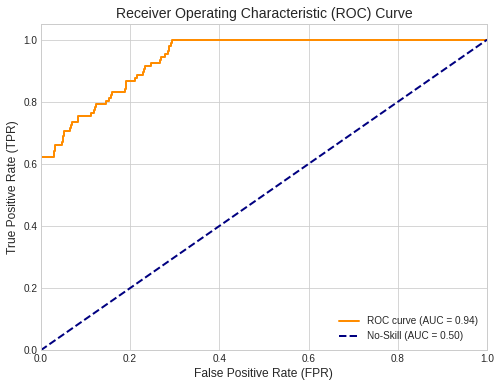

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_pred_proba):
    """
    Plots the Receiver Operating Characteristic (ROC) curve and calculates the Area Under the Curve (AUC).

    Args:
        y_true (array-like): True binary labels (0 or 1).
        y_pred_proba (array-like): Predicted probabilities for the positive class (class 1).
    """
    # --- 1. Calculate ROC curve points ---
    # The roc_curve function returns three arrays:
    # fpr: False Positive Rates
    # tpr: True Positive Rates
    # thresholds: The thresholds on the decision function used to compute fpr and tpr.
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)

    # --- 2. Calculate Area Under the Curve (AUC) ---
    roc_auc = auc(fpr, tpr)
    print(f"AUC Score: {roc_auc:.4f}")

    # --- 3. Plot the ROC curve ---
    # FIXED: Changed the style to 'seaborn-whitegrid' for better compatibility.
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=(8, 6))
    
    # Plot the ROC curve for our model
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    
    # Plot the "no-skill" line (random guessing)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No-Skill (AUC = 0.50)')
    
    # --- 4. Customize the plot ---
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)', fontsize=12)
    plt.ylabel('True Positive Rate (TPR)', fontsize=12)
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
    plt.legend(loc="lower right")
    plt.grid(True)
    
    # Display the plot
    plt.show()


# ============================================================================
# EXAMPLE USAGE
# ============================================================================

# In a real scenario, you would get these values from your model's predictions
# on a validation or test set.

# y_true: The actual ground truth labels (e.g., from your test_df['Churn'])
# y_pred_proba: The predicted probabilities from model.predict_proba(X_test)[:, 1]

# Let's generate some sample data to demonstrate the function.
print("Generating sample data for demonstration...")
np.random.seed(42)

# Create 500 true labels, with about 20% being the positive class (1)
y_true_sample = np.random.choice([0, 1], size=500, p=[0.8, 0.2])

# Create predicted probabilities.
# For the true negative class (0), probabilities should be low.
# For the true positive class (1), probabilities should be high.
y_pred_proba_sample = np.zeros(500)

# Indices for each class
true_neg_indices = np.where(y_true_sample == 0)[0]
true_pos_indices = np.where(y_true_sample == 1)[0]

# Generate probabilities for true negatives (mostly low values)
y_pred_proba_sample[true_neg_indices] = np.random.uniform(0.0, 0.6, size=len(true_neg_indices))

# Generate probabilities for true positives (mostly high values)
y_pred_proba_sample[true_pos_indices] = np.random.uniform(0.4, 1.0, size=len(true_pos_indices))


# Now, plot the ROC curve using our sample data
print("\nPlotting ROC curve...")
plot_roc_curve(y_true_sample, y_pred_proba_sample)
